In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer,InterclusterDistance
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.mixture import GaussianMixture

In [3]:
data = pd.read_csv('winequality-red.csv',skipinitialspace=True)

In [4]:
wine = data


In [5]:
wine_labels = wine['quality'].copy()

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine_set = wine.copy()


In [8]:
#wine_set.drop(columns=['quality','residual sugar','free sulfur dioxide','pH','fixed acidity'], inplace=True)
wine_set.drop(columns=['quality'], inplace=True)
train_set, test_set, train_labels, test_labels = train_test_split(wine_set,wine_labels,test_size=0.4,random_state=42)

In [9]:
scaler = StandardScaler()
scaler.fit(train_set)
train_set_scaler = scaler.transform(train_set)

In [10]:
scaler.fit(test_set)
test_set_scaler = scaler.transform(test_set)

In [11]:
one_hot = OneHotEncoder()

train_labels_hot = one_hot.fit_transform(train_labels.values.reshape(-1, 1)).todense()
test_labels_hot = one_hot.transform(test_labels.values.reshape(-1, 1)).todense()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [12]:
#k-means

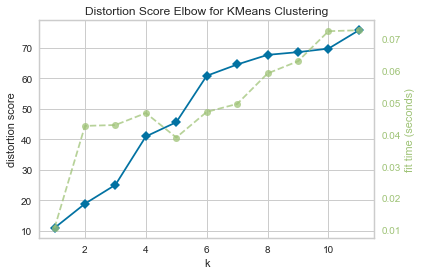

In [13]:

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(train_set_scaler)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

Text(0.5, 1.0, 'kmeans Scatter Plot')

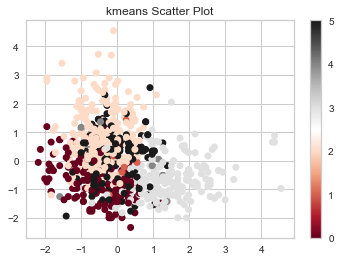

In [14]:
y_pred = KMeans(n_clusters=6, random_state=42).fit_predict(train_set_scaler)
plt.scatter(train_set_scaler[:, 0], train_set_scaler[:, 1],edgecolor = "None", c=y_pred,cmap="RdGy")
plt.colorbar()
plt.title('kmeans Scatter Plot')

In [15]:
#Exptation Maximization

In [16]:
score = []
for i in range(1,12,1):
    gmm = GaussianMixture(n_components=i,random_state=42).fit(train_set_scaler)
    score += [gmm.score(train_set_scaler)]


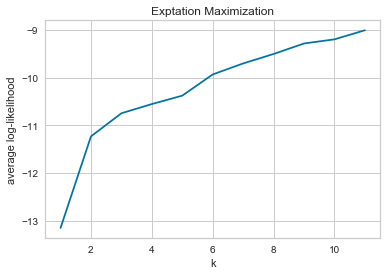

In [17]:
x = range(1,12,1)
plt.title('Exptation Maximization')
plt.plot(x,score,color= 'b',label='Train')
plt.xlabel('k')
plt.ylabel('average log-likelihood')
plt.show()

Text(0.5, 1.0, 'EM Scatter Plot')

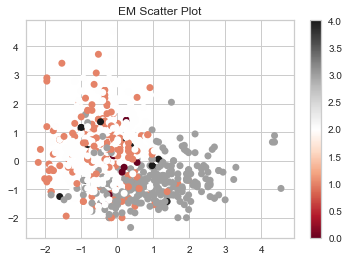

In [18]:
y_pred = GaussianMixture(n_components=5, random_state=42).fit_predict(train_set_scaler)
plt.scatter(train_set_scaler[:, 0], train_set_scaler[:, 1],edgecolor = "None", c=y_pred,cmap="RdGy")
plt.colorbar()
plt.title('EM Scatter Plot')

In [19]:
# dimensionality reduction algorithms


In [20]:
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif

In [21]:
# PCA

In [22]:
pca = PCA(n_components=6,random_state=42)
pca.fit(train_set_scaler)
#explained_variance_ratio = pca.explained_variance_ratio_
#singular_values = pca.singular_values_
pca_train = pca.fit_transform(train_set_scaler)

Text(0.5, 1.0, 'Orignal Scatter Plot')

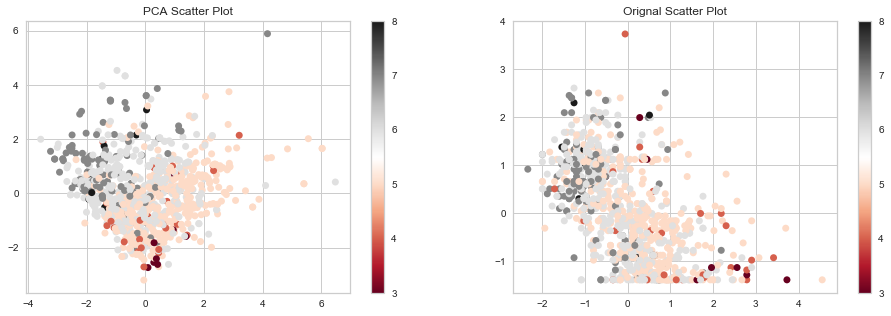

In [23]:
plt.figure(figsize = (16,5))
plt.subplot(121)
plt.scatter(pca_train[:,1],pca_train[:,2],  c = train_labels, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('PCA Scatter Plot')

plt.subplot(122)
plt.scatter(train_set_scaler[:,1],train_set_scaler[:,2],  c = train_labels, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('Orignal Scatter Plot')

In [24]:
eigenvalues = pca.explained_variance_
print(eigenvalues)

[3.04975867 1.91874007 1.55762225 1.20595783 1.00343427 0.67255722]


In [25]:
# ICA

Text(0, 0.5, 'Average Kurtosis across IC')

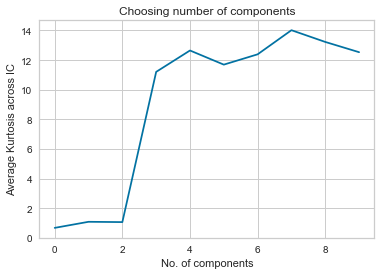

In [26]:
from scipy.stats import kurtosis, skew

avg_kurt = []
for component in range(1,11):
    #ICA feature transformation    
    ica = FastICA(n_components=component, random_state=42)
    X_r = ica.fit(train_set_scaler).transform(train_set_scaler)
    X_ica = X_r
    
    avg_kurt.append(np.mean(np.apply_along_axis(kurtosis, 0, X_ica)))

plt.plot(avg_kurt)
plt.title('Choosing number of components')
plt.xlabel('No. of components')
plt.ylabel('Average Kurtosis across IC')

In [27]:
ica = FastICA(n_components=7,random_state=42)
ica.fit(train_set_scaler)
ica_train = ica.fit_transform(train_set_scaler)   

Text(0.5, 1.0, 'Orignal Scatter Plot')

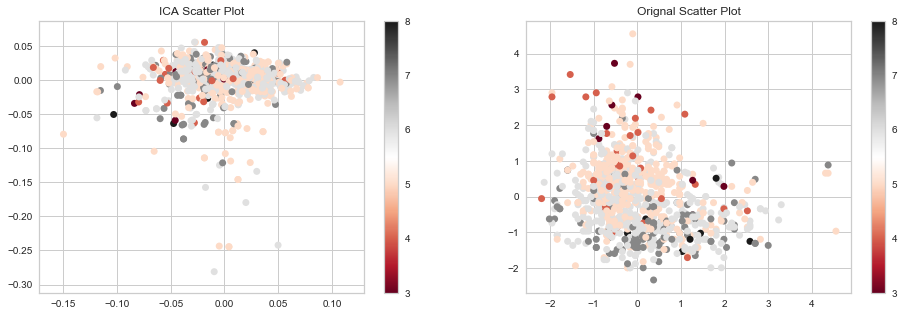

In [28]:
i = 0
j = 1
plt.figure(figsize = (16,5))
plt.subplot(121)
plt.scatter(ica_train[:,i],ica_train[:,j],  c = train_labels, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('ICA Scatter Plot')

plt.subplot(122)
plt.scatter(train_set_scaler[:,i],train_set_scaler[:,j],  c = train_labels, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('Orignal Scatter Plot')

In [29]:
# Random Projection

In [30]:
rp = GaussianRandomProjection(n_components=6,random_state=42)
rp_train = rp.fit_transform(train_set_scaler)   

In [31]:
rp_train.shape

(959, 6)

Text(0.5, 1.0, 'Orignal Scatter Plot')

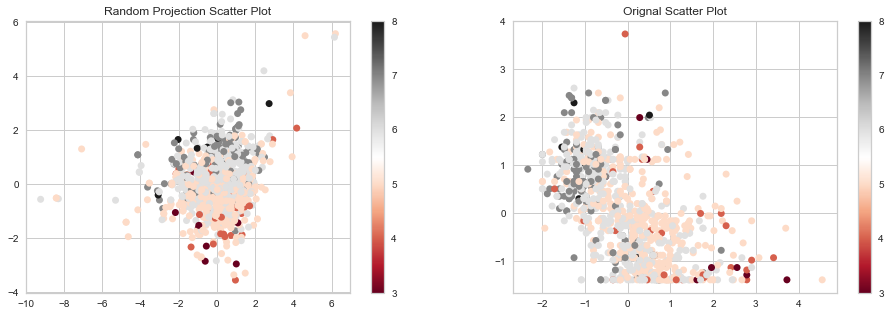

In [32]:
i = 1
j = 2
plt.figure(figsize = (16,5))
plt.subplot(121)
plt.scatter(rp_train[:,i],rp_train[:,j],  c = train_labels, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('Random Projection Scatter Plot')

plt.subplot(122)
plt.scatter(train_set_scaler[:,i],train_set_scaler[:,j],  c = train_labels, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('Orignal Scatter Plot')

In [33]:
# Select K Best


In [34]:
kbest_train = SelectKBest(mutual_info_classif, k=6).fit_transform(train_set_scaler,train_labels)

Text(0.5, 1.0, 'Orignal Scatter Plot')

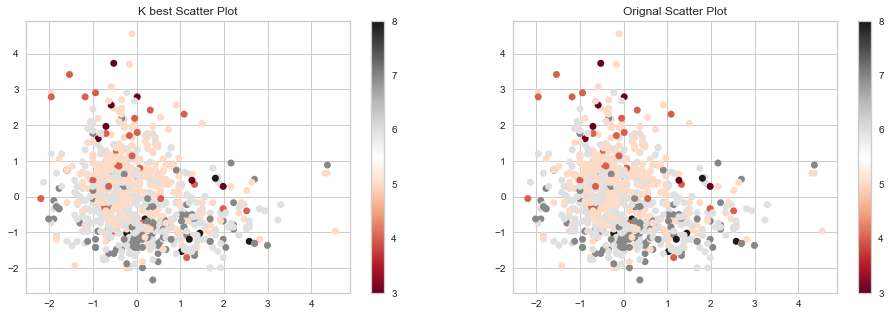

In [35]:
i = 0
j = 1
plt.figure(figsize = (16,5))
plt.subplot(121)
plt.scatter(kbest_train[:,i],kbest_train[:,j],  c = train_labels, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('K best Scatter Plot')

plt.subplot(122)
plt.scatter(train_set_scaler[:,i],train_set_scaler[:,j],  c = train_labels, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('Orignal Scatter Plot')

In [36]:
# Reprpduce Clustering Experiment

In [37]:
# Kmeans

In [38]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(pca_train)
print(kmeans.score(pca_train))

-4698.236161498097


In [39]:
pca_km = KMeans(n_clusters=5,random_state=42)
pca_km_set = pca_km.fit_transform(pca_train)
pca_km_labels = pca_km.labels_

In [40]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(ica_train)
print(kmeans.score(ica_train))

-4.599047215198512


In [41]:
ica_km = KMeans(n_clusters=5,random_state=42)
ica_km_set = ica_km.fit_transform(ica_train)
ica_km_labels = ica_km.labels_

In [42]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(rp_train)
print(kmeans.score(rp_train))

-4392.451404000561


In [43]:
rp_km = KMeans(n_clusters=5,random_state=42)
rp_km_set = rp_km.fit_transform(rp_train)
rp_km_labels = rp_km.labels_

In [44]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(kbest_train)
print(kmeans.score(kbest_train))

-2906.5192904400974


In [45]:
kbest_km = KMeans(n_clusters=5,random_state=42)
kbest_km_set = kbest_km.fit_transform(kbest_train)
kbest_km_labels = kbest_km.labels_

In [46]:
# Exptation Maximization

In [47]:
gmm = GaussianMixture(n_components=5).fit(pca_train)
score = gmm.score(pca_train)
print(score)

-7.910948822691408


In [48]:
gmm = GaussianMixture(n_components=5).fit(ica_train)
score = gmm.score(ica_train)
print(score)

16.056468052640625


In [49]:
gmm = GaussianMixture(n_components=5).fit(rp_train)
score = gmm.score(rp_train)
print(score)

-7.216991119256618


In [50]:
gmm = GaussianMixture(n_components=5).fit(kbest_train)
score = gmm.score(kbest_train)
print(score)

-6.853072551197609


In [51]:
# Neural Network

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,average_precision_score
from sklearn.model_selection import cross_val_score,GridSearchCV, learning_curve
from timeit import default_timer as timer

In [53]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [54]:
mlp1 = MLPClassifier(hidden_layer_sizes=10,alpha=0.01,max_iter=8000,random_state=42)
start = timer()
mlp1.fit(train_set_scaler,train_labels)
end = timer()
print(mlp1.score(train_set_scaler, train_labels))
print('fit time :')
print(end - start) 

0.6558915537017727
fit time :
0.9651292500000039


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

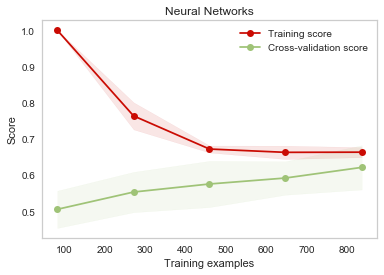

In [55]:
plot_learning_curve(mlp1,'Neural Networks',train_set_scaler,train_labels,cv=8)

In [145]:
mlp2 = MLPClassifier(hidden_layer_sizes=10,alpha=0.01,max_iter=8000,random_state=42)
start = timer()
mlp2.fit(pca_train,train_labels)
end = timer()
print(mlp2.score(pca_train, train_labels))
print('fit time :')
print(end - start) 

0.6392075078206465
fit time :
0.5894243040020228


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

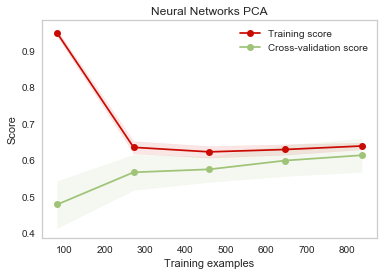

In [82]:
plot_learning_curve(mlp2,'Neural Networks PCA',pca_train,train_labels,cv=8)

In [147]:
mlp3 = MLPClassifier(hidden_layer_sizes=10,alpha=0.01,max_iter=8000,random_state=42)
start = timer()
mlp3.fit(ica_train,train_labels)
end = timer()
print(mlp3.score(ica_train, train_labels))
print('fit time :')
print(end - start) 

0.6068821689259646
fit time :
1.0604020949976984


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

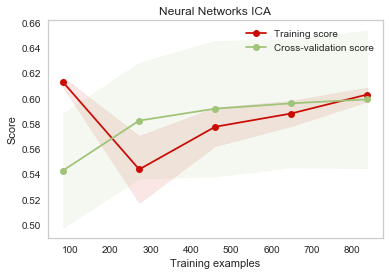

In [148]:
plot_learning_curve(mlp3,'Neural Networks ICA',ica_train,train_labels,cv=8)

In [85]:
mlp4 = MLPClassifier(hidden_layer_sizes=10,alpha=0.01,max_iter=8000,random_state=42)
start = timer()
mlp4.fit(rp_train,train_labels)
end = timer()
print(mlp4.score(rp_train, train_labels))
print('fit time :')
print(end - start) 

0.6308654848800834
fit time :
0.7693765219999023


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

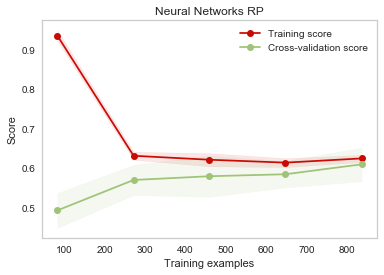

In [86]:
plot_learning_curve(mlp4,'Neural Networks RP',rp_train,train_labels,cv=8)

In [87]:
mlp5 = MLPClassifier(hidden_layer_sizes=10,alpha=0.01,max_iter=8000,random_state=42)
start = timer()
mlp5.fit(kbest_train,train_labels)
end = timer()
print(mlp5.score(kbest_train, train_labels))
print('fit time :')
print(end - start) 

0.6423357664233577
fit time :
0.7049681519999922


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

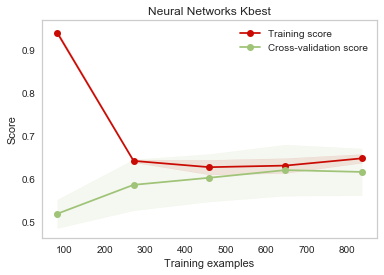

In [88]:
plot_learning_curve(mlp5,'Neural Networks Kbest',kbest_train,train_labels,cv=8)

In [89]:
#  Neural Network after clustering and feature selection

In [90]:
mlp6 = MLPClassifier(hidden_layer_sizes=10,alpha=0.01,max_iter=8000,random_state=42)
start = timer()
mlp6.fit(pca_km_set,pca_km_labels)
end = timer()
print(mlp6.score(pca_km_set,pca_km_labels))
print('fit time :')
print(end - start) 

0.9989572471324296
fit time :
1.076511771000014


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

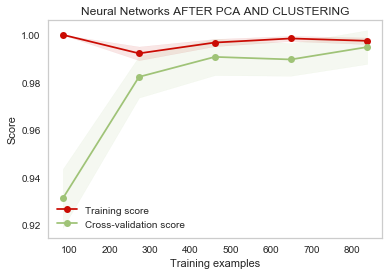

In [91]:
plot_learning_curve(mlp6,'Neural Networks AFTER PCA AND CLUSTERING',pca_km_set,pca_km_labels,cv=8)

In [92]:
mlp7 = MLPClassifier(hidden_layer_sizes=10,alpha=0.01,max_iter=8000,random_state=42)
start = timer()
mlp7.fit(ica_km_set,ica_km_labels)
end = timer()
print(mlp7.score(ica_km_set,ica_km_labels))
print('fit time :')
print(end - start) 

0.9895724713242962
fit time :
2.9734795659999236


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

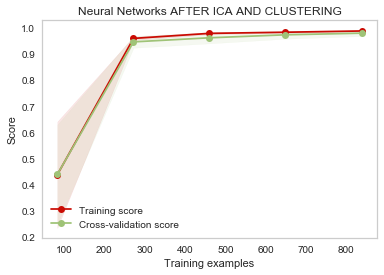

In [95]:
plot_learning_curve(mlp7,'Neural Networks AFTER ICA AND CLUSTERING',ica_km_set,ica_km_labels,cv=8)

In [96]:
mlp8 = MLPClassifier(hidden_layer_sizes=10,alpha=0.01,max_iter=8000,random_state=42)
start = timer()
mlp8.fit(rp_km_set,rp_km_labels)
end = timer()
print(mlp8.score(rp_km_set,rp_km_labels))
print('fit time :')
print(end - start) 

0.9927007299270073
fit time :
0.9966440250000232


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

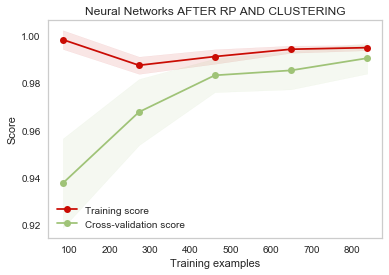

In [97]:
plot_learning_curve(mlp8,'Neural Networks AFTER RP AND CLUSTERING',rp_km_set,rp_km_labels,cv=8)

In [57]:
mlp9 = MLPClassifier(hidden_layer_sizes=10,alpha=0.01,max_iter=8000,random_state=42)
start = timer()
mlp9.fit(kbest_km_set,kbest_km_labels)
end = timer()
print(mlp9.score(kbest_km_set,kbest_km_labels))
print('fit time :')
print(end - start) 

0.9979144942648592
fit time :
1.0251101919999996


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

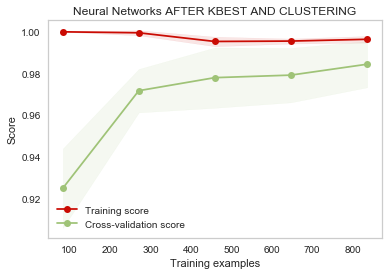

In [59]:
plot_learning_curve(mlp9,'Neural Networks AFTER KBEST AND CLUSTERING',kbest_km_set,kbest_km_labels,cv=8)

In [100]:
# The other Dataset

In [170]:
data2 = pd.read_csv('phishing.csv',skipinitialspace=True)

In [171]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
index                          11055 non-null int64
having_IPhaving_IP_Address     11055 non-null int64
URLURL_Length                  11055 non-null int64
Shortining_Service             11055 non-null int64
having_At_Symbol               11055 non-null int64
double_slash_redirecting       11055 non-null int64
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Favicon                        11055 non-null int64
port                           11055 non-null int64
HTTPS_token                    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
Submitt

In [172]:
phishing_labels = data2['Result'].copy()

In [173]:
phishing = data2.copy()

In [174]:
phishing.drop(columns=['index','Result'], inplace=True)

In [175]:
scaler = StandardScaler()
scaler.fit(phishing)
phishing_set = scaler.transform(phishing)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [230]:
train_set2, test_set, train_labels2, test_labels = train_test_split(phishing_set,phishing_labels,test_size=0.2,random_state=42)

In [177]:
# K Means

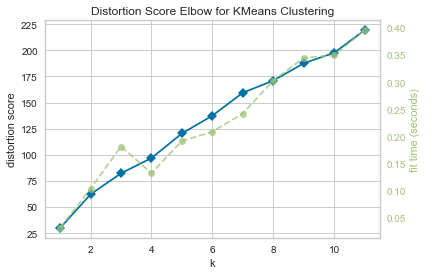

In [211]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(train_set2)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

Text(0.5, 1.0, 'kmeans Scatter Plot')

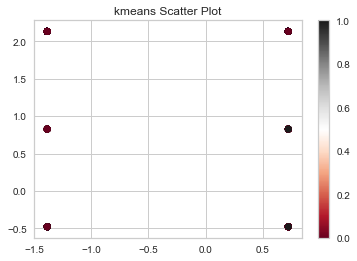

In [212]:
y_pred1 = KMeans(n_clusters=2, random_state=42).fit_predict(train_set2)
plt.scatter(train_set2[:, 0], train_set2[:, 1],edgecolor = "None", c=y_pred1,cmap="RdGy")
plt.colorbar()
plt.title('kmeans Scatter Plot')

In [45]:
# Expatation Maximization

In [231]:
score = []
for i in range(1,12,1):
    gmm = GaussianMixture(n_components=i,random_state=42).fit(train_set2)
    score += [gmm.score(train_set2)]

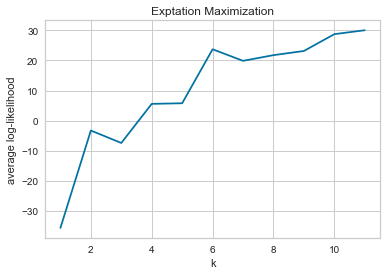

In [232]:
x = range(1,12,1)
plt.title('Exptation Maximization')
plt.plot(x,score,color= 'b',label='Train')
plt.xlabel('k')
plt.ylabel('average log-likelihood')
plt.show()

In [233]:
gm2 = GaussianMixture(n_components=2, random_state=42).fit(train_set2)
y_pred_gm2 = gm2.predict(train_set2)
score2 = gm2.score(train_set2)
print(score2)

-3.2541687071404195


In [234]:
gm3 = GaussianMixture(n_components=3, random_state=42).fit(train_set2)
y_pred_gm3 = gm3.predict(train_set2)
score3 = gm3.score(train_set2)
print(score3)

-7.389321267180781


Text(0.5, 1.0, 'GM Scatter Plot')

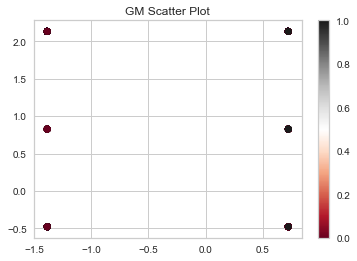

In [235]:
plt.scatter(train_set2[:, 0], train_set2[:, 1],edgecolor = "None", c=y_pred_gm2,cmap="RdGy")
plt.colorbar()
plt.title('GM Scatter Plot')

In [48]:
# dimensionality reduction algorithms

In [236]:
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif

In [167]:
# PCA

In [241]:
pca = PCA(n_components=15,random_state=42)
pca.fit(train_set2)
pca_train = pca.fit_transform(train_set2)

Text(0, 0.5, 'Score')

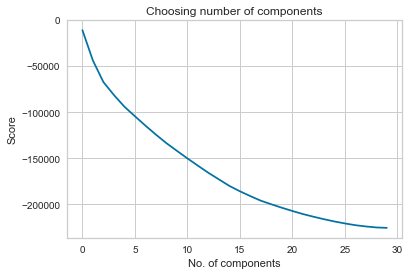

In [259]:
score3 = []
for i in range(1,31):
    pca = PCA(n_components=i,random_state=42)
    pca.fit(train_set2)
    pca_train = pca.fit_transform(train_set2)
    kmeans = KMeans(n_clusters=2, random_state=42).fit(pca_train)
    score3 +=[kmeans.score(pca_train)]
plt.plot(score3)
plt.title('Choosing number of components')
plt.xlabel('No. of components')
plt.ylabel('Score')

Text(0.5, 1.0, 'Orignal Scatter Plot')

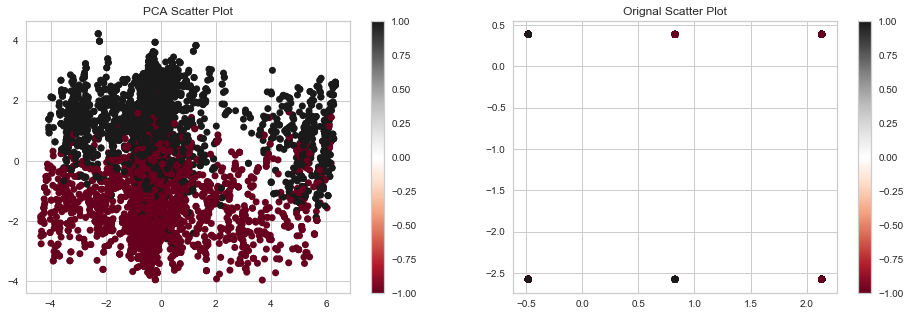

In [243]:
plt.figure(figsize = (16,5))
plt.subplot(121)
plt.scatter(pca_train[:,1],pca_train[:,2],  c = train_labels2, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('PCA Scatter Plot')

plt.subplot(122)
plt.scatter(train_set[:,1],train_set[:,2],  c = train_labels2, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('Orignal Scatter Plot')

In [227]:
eigenvalues = pca.explained_variance_
print(eigenvalues)

[1.10079719e+03 5.62471628e+01 2.96210627e+00 1.90165185e+00
 1.05696297e+00 4.22952583e-02]


In [53]:
# ICA

/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:305: UserWarning: n_components is too large: it will be set to 30
  warnings.warn('n_components is too large: it will be set to %s' % n_components)


Text(0, 0.5, 'Average Kurtosis across IC')

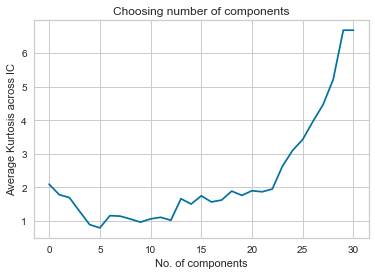

In [253]:
from scipy.stats import kurtosis, skew

avg_kurt = []
for component in range(1,32):
    #ICA feature transformation    
    ica = FastICA(n_components=component, random_state=42)
    X_r = ica.fit(train_set2).transform(train_set2)
    X_ica = X_r
    
    avg_kurt.append(np.mean(np.apply_along_axis(kurtosis, 0, X_ica)))

plt.plot(avg_kurt)
plt.title('Choosing number of components')
plt.xlabel('No. of components')
plt.ylabel('Average Kurtosis across IC')

In [254]:
ica = FastICA(n_components=29,random_state=42)
ica.fit(train_set2)
ica_train = ica.fit_transform(train_set2) 

In [255]:
len(ica_train)

8844

Text(0.5, 1.0, 'Orignal Scatter Plot')

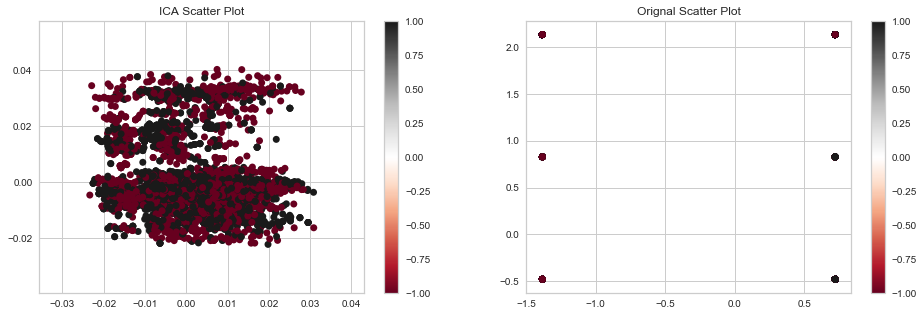

In [256]:
i = 0
j = 1
plt.figure(figsize = (16,5))
plt.subplot(121)
plt.scatter(ica_train[:,i],ica_train[:,j],  c = train_labels2, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('ICA Scatter Plot')

plt.subplot(122)
plt.scatter(train_set2[:,i],train_set2[:,j],  c = train_labels2, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('Orignal Scatter Plot')

In [56]:
# Random Projection

In [260]:
rp = GaussianRandomProjection(n_components=6,random_state=42)
rp_train = rp.fit_transform(train_set)   

Text(0.5, 1.0, 'Orignal Scatter Plot')

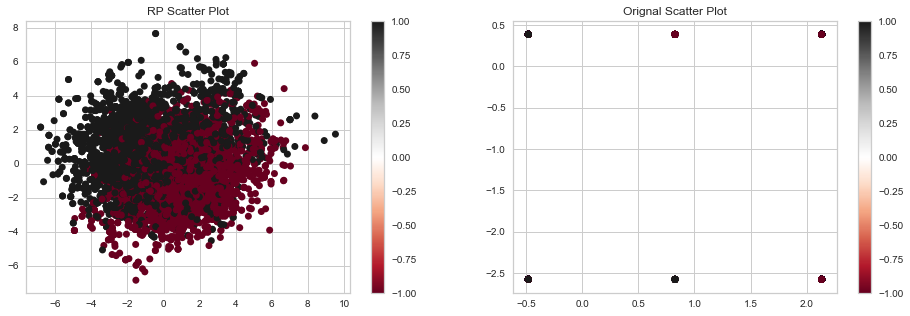

In [261]:
i = 1
j = 2
plt.figure(figsize = (16,5))
plt.subplot(121)
plt.scatter(rp_train[:,i],rp_train[:,j],  c = train_labels, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('RP Scatter Plot')

plt.subplot(122)
plt.scatter(train_set[:,i],train_set[:,j],  c = train_labels, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('Orignal Scatter Plot')

In [262]:
# Select K Best

In [263]:
kbest_train = SelectKBest(mutual_info_classif, k=6).fit_transform(train_set,train_labels)

Text(0.5, 1.0, 'Orignal Scatter Plot')

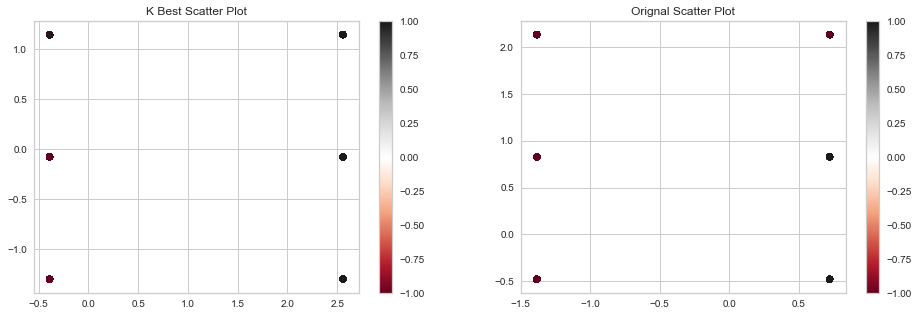

In [264]:
i = 0
j = 1
plt.figure(figsize = (16,5))
plt.subplot(121)
plt.scatter(kbest_train[:,i],kbest_train[:,j],  c = train_labels, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('K Best Scatter Plot')

plt.subplot(122)
plt.scatter(train_set[:,i],train_set[:,j],  c = train_labels, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('Orignal Scatter Plot')

In [62]:
# Reprpduce Clustering Experiment
         # Kmeans

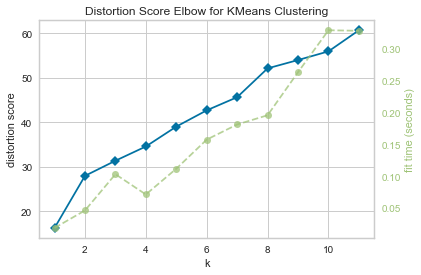

In [73]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))


visualizer.fit(pca_train)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

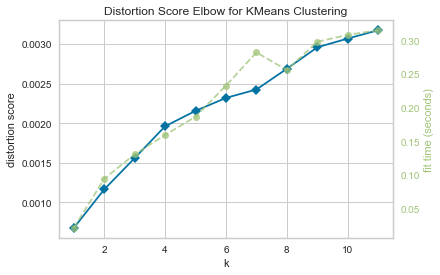

In [75]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(ica_train)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

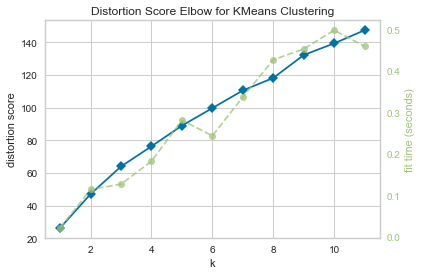

In [77]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(rp_train)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

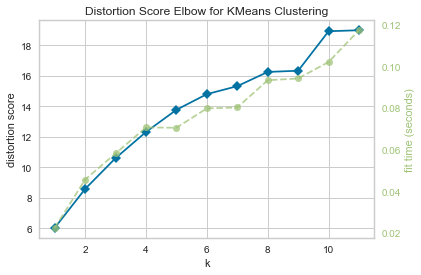

In [79]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(kbest_train)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [80]:
# Exptation Maximization

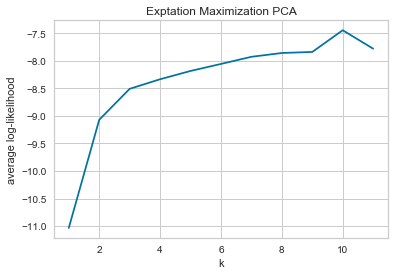

In [81]:
score = []
for i in range(1,12,1):
    gmm = GaussianMixture(n_components=i).fit(pca_train)
    score += [gmm.score(pca_train)]
x = range(1,12,1)
plt.title('Exptation Maximization PCA')
plt.plot(x,score,color= 'b',label='Train')
plt.xlabel('k')
plt.ylabel('average log-likelihood')
plt.show()

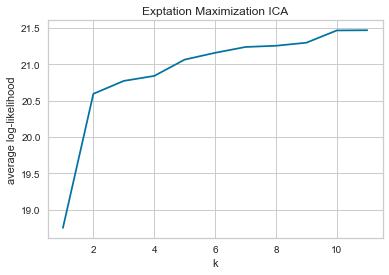

In [82]:
score = []
for i in range(1,12,1):
    gmm = GaussianMixture(n_components=i).fit(ica_train)
    score += [gmm.score(ica_train)]
x = range(1,12,1)
plt.title('Exptation Maximization ICA')
plt.plot(x,score,color= 'b',label='Train')
plt.xlabel('k')
plt.ylabel('average log-likelihood')
plt.show()

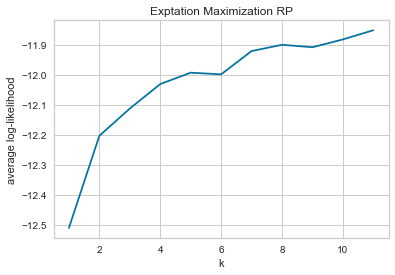

In [83]:
score = []
for i in range(1,12,1):
    gmm = GaussianMixture(n_components=i).fit(rp_train)
    score += [gmm.score(rp_train)]
x = range(1,12,1)
plt.title('Exptation Maximization RP')
plt.plot(x,score,color= 'b',label='Train')
plt.xlabel('k')
plt.ylabel('average log-likelihood')
plt.show()

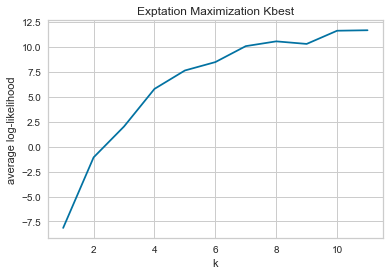

In [84]:
score = []
for i in range(1,12,1):
    gmm = GaussianMixture(n_components=i).fit(kbest_train)
    score += [gmm.score(kbest_train)]
x = range(1,12,1)
plt.title('Exptation Maximization Kbest')
plt.plot(x,score,color= 'b',label='Train')
plt.xlabel('k')
plt.ylabel('average log-likelihood')
plt.show()

In [274]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(pca_train)
print(kmeans.score(pca_train))

-225722.49578487416


In [275]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(ica_train)
print(kmeans.score(ica_train))

-28.000000106174795


In [276]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(rp_train)
print(kmeans.score(rp_train))

-194781.56219363105


In [277]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(kbest_train)
print(kmeans.score(kbest_train))

-38976.350588466594


In [278]:
gmm = GaussianMixture(n_components=2).fit(pca_train)
score = gmm.score(pca_train)
print(score)

-18.80335522808959


In [279]:
gmm = GaussianMixture(n_components=2).fit(ica_train)
score = gmm.score(ica_train)
print(score)

98.78418720020818


In [280]:
gmm = GaussianMixture(n_components=2).fit(rp_train)
score = gmm.score(rp_train)
print(score)

-12.203896272204467


In [281]:
gmm = GaussianMixture(n_components=2).fit(kbest_train)
score = gmm.score(kbest_train)
print(score)

-1.0872549730093473
